In [122]:
import pandas as pd
import rdkit
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
import torch

In [ ]:
inp = pd.read_csv('./data/train.txt', names=['SMILES'])
out = pd.read_csv('./fast_molvae/sample.txt', names=['SMILES'])

In [ ]:
inp['INCHI'] = inp['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
inp = inp.drop_duplicates(subset=['INCHI'], keep='first')

In [ ]:
inp

In [ ]:
out['INCHI'] = out['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
out = out.drop_duplicates(subset=['INCHI'], keep='first')

In [ ]:
out

In [1]:
from fast_molvae.sample import load_model

In [2]:
# sample('./data/vocab.txt', './outfile.txt', './fast_molvae/vae_model/model.epoch-19', 10)
model = load_model('./data/vocab.txt', './fast_molvae/vae_model/model.epoch-19', 10)

/home/bibyutatsu/anaconda3/envs/Rdkit_env/lib/python3.7/site-packages/torch-1.0.1-py3.7-linux-x86_64.egg/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [213]:
z = torch.randn(1, 56//2).cuda()

In [225]:
z.shape

torch.Size([1, 28])

In [214]:
model.decode(z, z, False)

'CN1C=C([NH3+])C=C(C(=O)NOCc2ccccc2)C1'

In [215]:
import matplotlib.pyplot as plt

In [216]:
x = [i for _ in range(7) for i in range(-3, 4)]
y = [i for i in range(-3, 4) for _ in range(7)]
label_float = [(z[0][0].item()*(1 + xs*2), z[0][1].item()*(1 + ys*2)) for xs, ys in zip(reversed(x), reversed(y))]
label = ['%.3f'%(xs)+','+ '%.3f'%(ys) for xs, ys in label_float]#zip(reversed(x), reversed(y))]
z_labels = [z.detach().clone() for _ in range(len(x))]
for i, (xs, ys) in enumerate(label_float):
    z_labels[i][0][0] = xs
    z_labels[i][0][1] = ys

In [217]:
# plt.figure(figsize=(10,10))
# for xs, ys, labels in zip(x, y, label):
# #     print(labels, xs,ys)
#     plt.annotate(labels, (xs, ys))
# plt.plot(x,y, 'o')

In [218]:
smiles = []
for zs in z_labels:
    smiles.append(model.decode(zs, zs, False))

In [219]:
smiles

['COn1ccc(C)cc1=O',
 'COn1ccc(C)cc1=O',
 'Cc1ccn(Oc2ccccc2)c(=O)c1',
 'Cc1ccn(Oc2ccccc2)c(=O)c1',
 'CC(O)c1ccn(C)c(=O)c1',
 'NC1=CCNC(C(=O)Oc2ccccc2)=C1',
 'NC1=CCNC(C(=O)Oc2ccccc2F)=C1',
 'Cc1ccn(OC2COCc3ccccc32)c(=O)c1',
 'Cc1ccn(OC(C)c2cc[nH+]cc2)c(=O)c1',
 'Cc1ccn(OC(C)c2cc[nH+]cc2)c(=O)c1',
 'Cc1ccn(OC(C)c2cc[nH+]cc2)c(=O)c1',
 'NC1=CCNC(C(=O)Oc2ccccc2F)=C1',
 'NC1=CCNC(C(=O)Oc2ccccc2F)=C1',
 'NC1=CCNC=C1C(=O)Oc1ccccc1F',
 'CON1C=C(C(=O)NC2CCCOC2)C=CC1',
 'CON1C=C(C(=O)NC2CCCOC2)C=CC1',
 'CON1C=CC=C(C(=O)NC2CCCOC2)C1',
 'CN1C=CC=C(C(=O)NOCC2CC[NH2+]C2)C1',
 'NC1=CC([NH3+])NC(C(=O)NOCc2ccccc2)=C1',
 'NC1=CCNC([NH3+])=C1C(=O)NOCc1ccccc1',
 'NC1=CCNC([NH3+])=C1C(=O)NOCc1ccccc1',
 'CC(=O)C(C)On1cnc(N2CCCCC2)n1',
 'CON1C=C(C(=O)NC2CCCOC2)C=CC1',
 'CON1C=C(C(=O)NC2CCOc3ccccc32)C=CC1',
 'CN1C=C([NH3+])C=C(C(=O)NOCc2ccccc2)C1',
 'NC1=CNCC([NH3+])=C1C(=O)NOCc1ccccc1',
 'NC1=CNCC([NH3+])=C1C(=O)NOCc1ccccc1',
 'NC1=CNC2N=CC=CC2=C1C(=O)NC1Cc2ccccc2CO1',
 'COn1cnc(C[NH+]2CCCC(C)(C)C2)n1',
 'CO

In [222]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=7,subImgSize=(250,250))

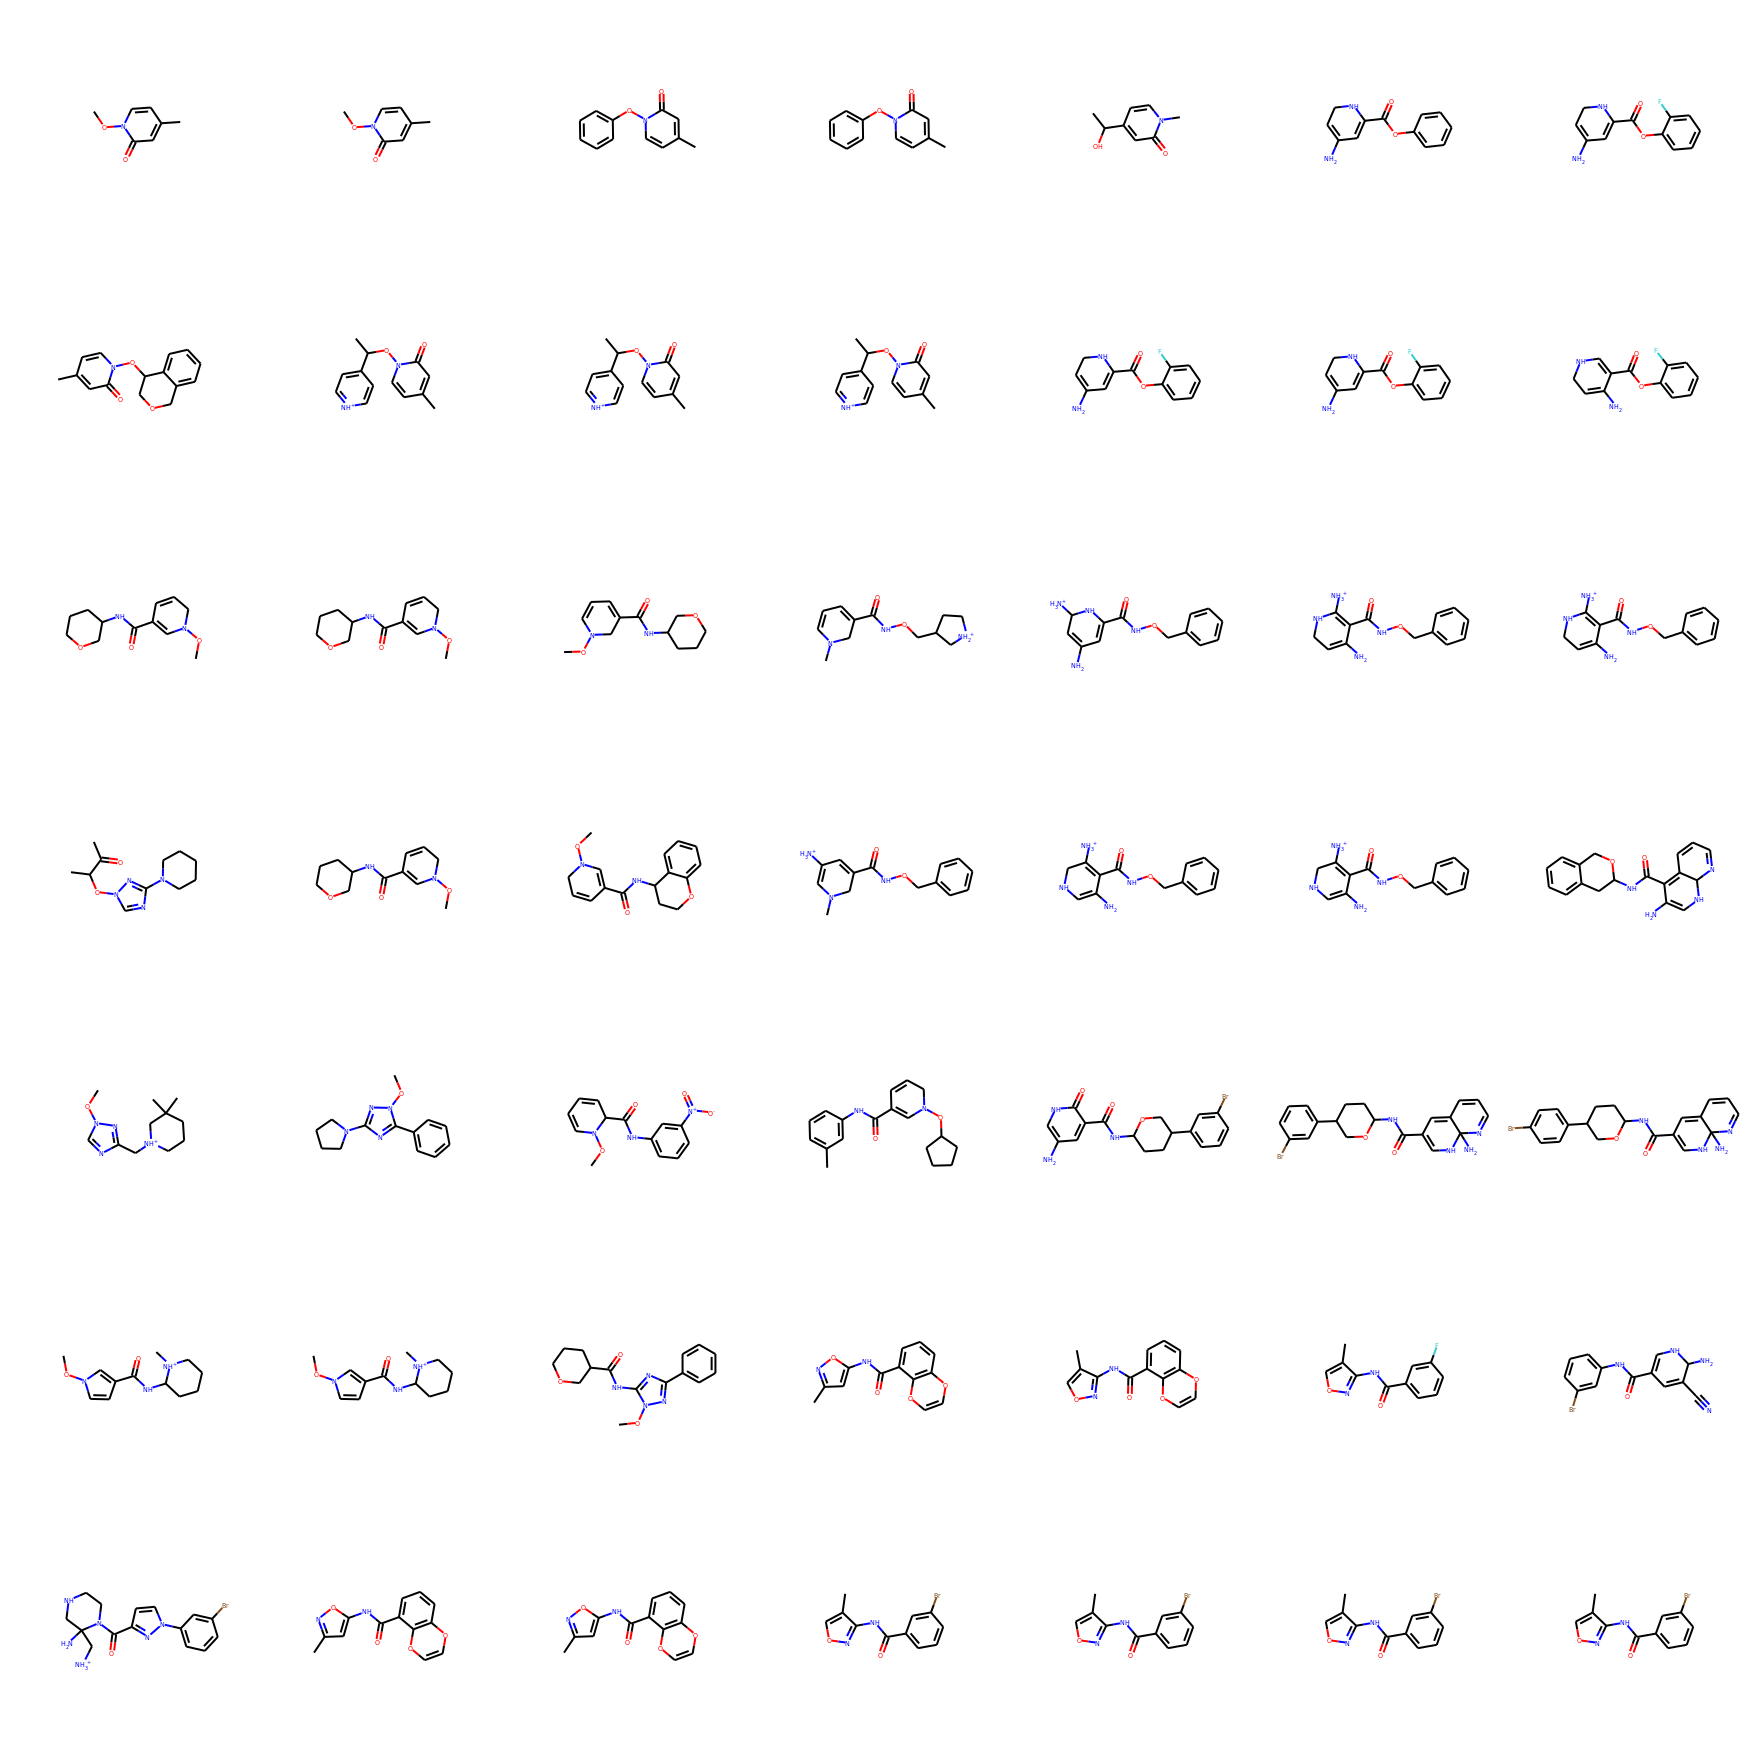

In [223]:
img